### Machine Learning
#### Linear Regression with MSE
In this section will:
- Calculate the mean-squared error (MSE)

- Explore how model parameters (slope) influence the MSE

- Find the optimal model parameter using least-squares optimization

#### Setup
_Import necessary moudules and functions_

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# @title Figure Settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [5]:
# @title Plotting Functions

def plot_observed_vs_predicted(x, y, y_hat, theta_hat):
  """ Plot observed vs predicted data

  Args:
    x (ndarray): observed x values
    y (ndarray): observed y values
    y_hat (ndarray): predicted y values
    theta_hat (ndarray):
  """
  fig, ax = plt.subplots()
  ax.scatter(x, y, label='Observed')  # our data scatter plot
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
  ax.set(
      title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {np.mean((y - y_hat)**2):.2f}",
      xlabel='x',
      ylabel='y'
  )
  ax.legend()
  plt.show()

#### Linear Regression and Mean Squared Error
To investigate how we can model data, first generate a noisy dataset and then try to estimate the underlying model that produced it.

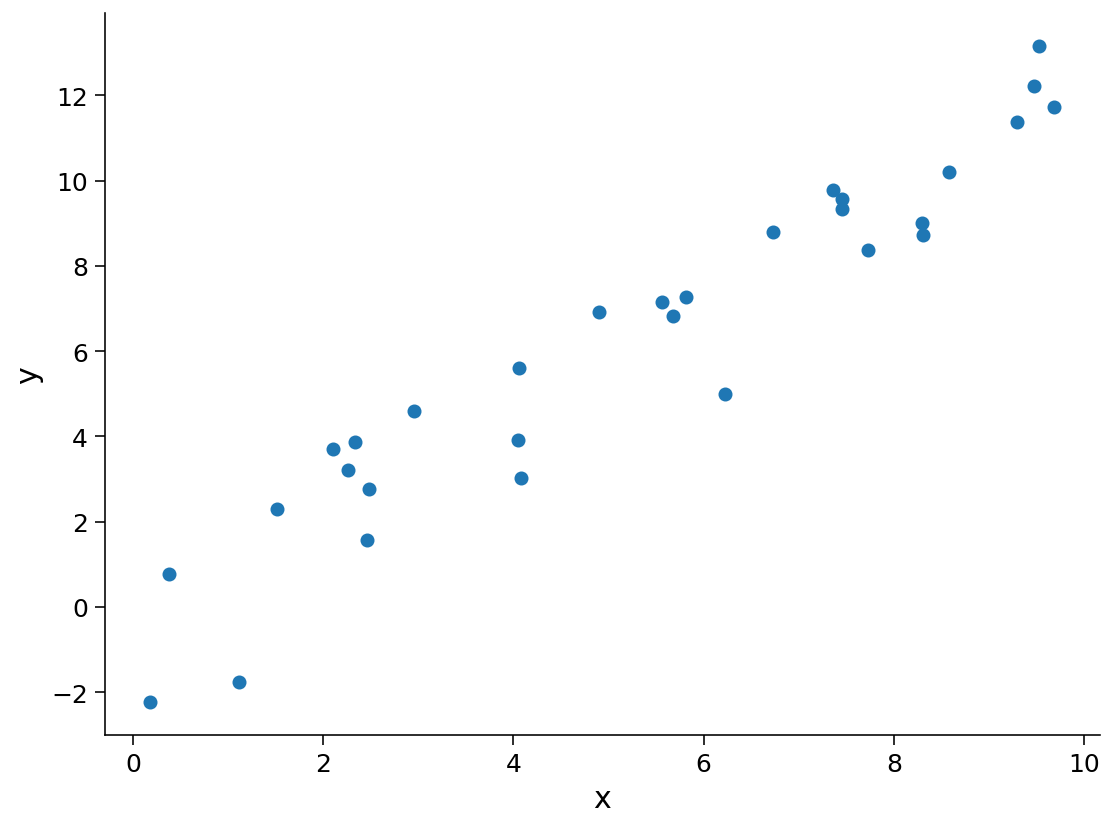

In [6]:
# @title

# @markdown Execute this cell to generate some simulated data

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 30

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

### Computing MSE
We use MSE to evaluate how successful a particular slope estimate $\hat{\theta}$ is for explaining the data, with the closer to 0 the MSE is, the better our estimate fits the data.

Estimated $y$ for a single data point is:
$$
\hat{y}_{i}=\theta x_{i}
$$
Mean squared error:
$$
min\frac{1}{N} \sum \limits_{i=1} ^{N}(y_{i} - \hat{y}_{i})^2
$$

Computing MSE for three arbitary choices of theta:

In [7]:
def mse(x, y, theta_hat):
  """Compute the mean squared error

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta_hat (float): An estimate of the slope parameter

  Returns:
    float: The mean squared error of the data with the estimated parameter.
  """
  # Compute the estimated y
  y_hat = theta_hat*x

  # Compute mean squared error
  mse = np.mean((y-y_hat)**2)

  return mse


theta_hats = [0.75, 1.0, 1.5]
for theta_hat in theta_hats:
  print(f"theta_hat of {theta_hat} has an MSE of {mse(x, y, theta_hat):.2f}")

theta_hat of 0.75 has an MSE of 9.08
theta_hat of 1.0 has an MSE of 3.01
theta_hat of 1.5 has an MSE of 4.52


$\hat{\theta}=1$ is the best estimate as it has the lowest MSE.

Visualizing the estimated models:

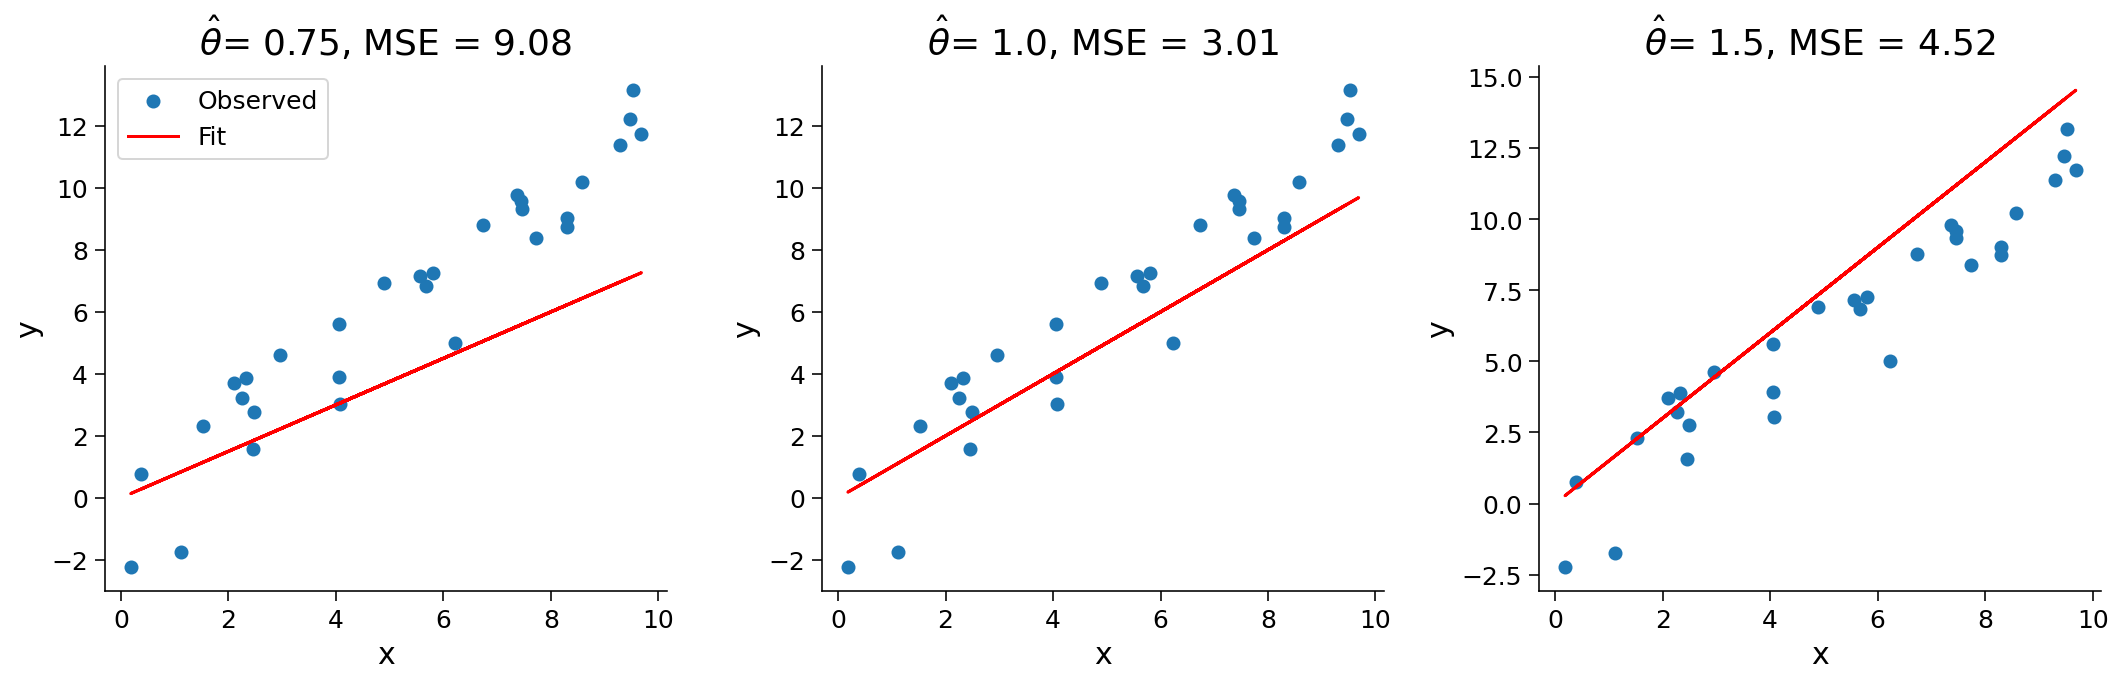

In [8]:
# @markdown Execute this cell to visualize estimated models

fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
for theta_hat, ax in zip(theta_hats, axes):

  # True data
  ax.scatter(x, y, label='Observed')  # our data scatter plot

  # Compute and plot predictions
  y_hat = theta_hat * x
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model

  ax.set(
      title= fr'$\hat{{\theta}}$= {theta_hat}, MSE = {np.mean((y - y_hat)**2):.2f}',
      xlabel='x',
      ylabel='y'
  );

axes[0].legend()
plt.show()

Visualizing shows us how well our estimated models fit the data. Using an interactive widget, can easily see how changing slope estimate changes the model fit.

In [9]:
@widgets.interact(theta_hat=widgets.FloatSlider(1.0, min=0.0, max=2.0))
def plot_data_estimate(theta_hat):
  y_hat = theta_hat * x
  plot_observed_vs_predicted(x, y, y_hat, theta_hat)

interactive(children=(FloatSlider(value=1.0, description='theta_hat', max=2.0), Output()), _dom_classes=('widg…

#### Least-Squares Optimization
Instead of estimating MSE, solve for it analytically.

Done by minimizing the cost function, MSE is a convex objective function, therefore can compute a minimum via calulus. 

Find that: 
$$
\hat{\theta}=\frac{x^T y}{x^T x}
$$
where $x$ and $y$ are vectors of data points. Here we are multiplying the transpose of one matrix onto another matrix. (See end for derivation)

#### Solving for Optimal Estimator

Writing a function using Least-Square Optimization to find the optimal $\hat{\theta}$. Then use this function to compute $\hat{\theta}$ and plot the resulting prediction.

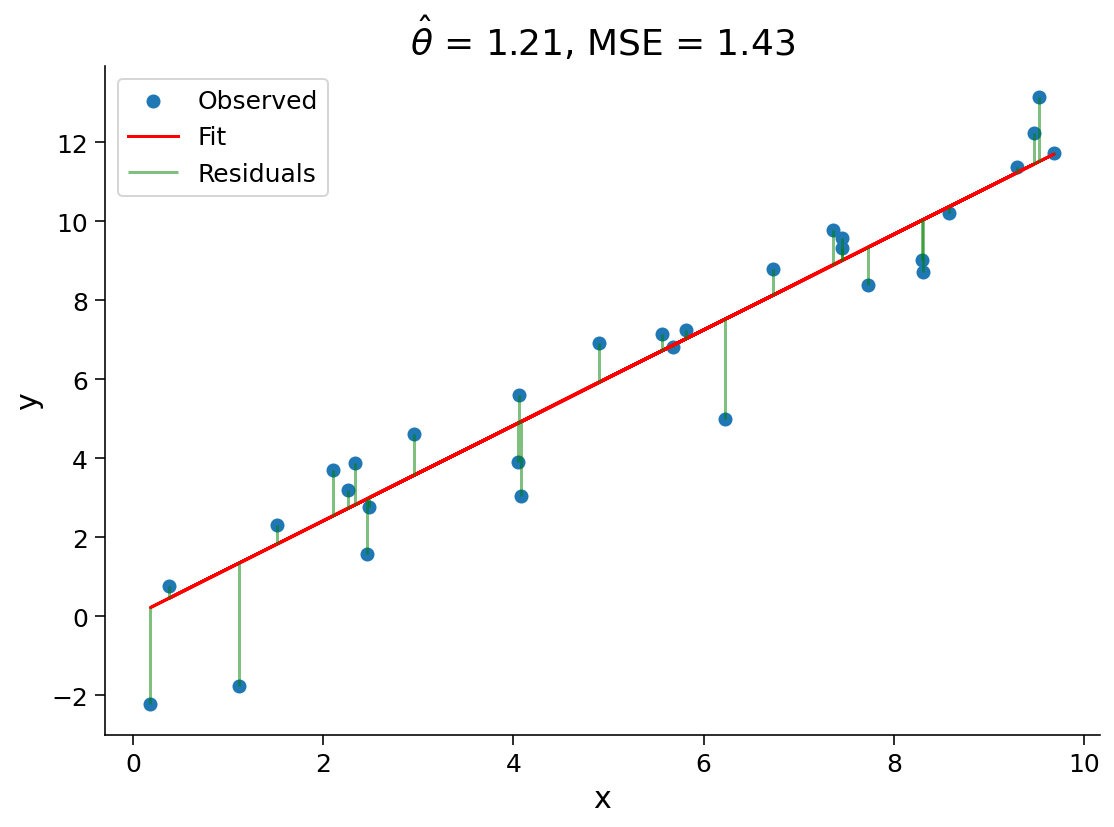

In [11]:
def solve_normal_eqn(x, y):
  """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.

    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    float: the value for theta_hat arrived from minimizing MSE
  """

  # Compute theta_hat analytically
  theta_hat = (x.T @y)/(x.T @x) #@ here is used as a matrix multiplication

  return theta_hat


theta_hat = solve_normal_eqn(x, y)
y_hat = theta_hat * x
plot_observed_vs_predicted(x, y, y_hat, theta_hat)

This analytic solution gives a much lower MSE of 1.43.

#### Summary
Linear least squares regression is an optimization procedure that can be used for data fitting.
- __MSE__ is a performance measure
- Procedurally minimize __MSE__ by solving the normal equations

Fit the model by defining an _objective_ function and minimizing it.

#### Least Square Optimization Derivation
Set Derivative of error expression with respect to $\theta$ equal to zero:
$$
\begin{align}
\frac{d}{d\theta}\frac{1}{N}\sum_{i=1}^N(y_i - \theta x_i)^2 &= 0 \\
\end{align}
$$
Then using the chain rule we get:
$$
\begin{align}
\frac{1}{N}\sum_{i=1}^N-2x_i(y_i - \theta x_i) &= 0
\end{align}
$$
Now solving for $\theta$ we obtain an optimal value of:
$$
\begin{equation}
\hat\theta = \frac{\sum_{i=1}^N x_i y_i}{\sum_{i=1}^N x_i^2}
\end{equation}
$$
Which is written in vector notation as:
$$
\begin{equation}
\hat\theta = \frac{\mathbf{x}^\top \mathbf{y}}{\mathbf{x}^\top \mathbf{x}}
\end{equation}
$$